# Exercise 2 : Logistic Regression with Regularization

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo

### Read data

In [13]:
data = pd.read_csv("ex2data2.txt", header=None, names=["test1", "test2", "acceptance"])

In [14]:
data

,test1,test2,acceptance
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


### Visualization

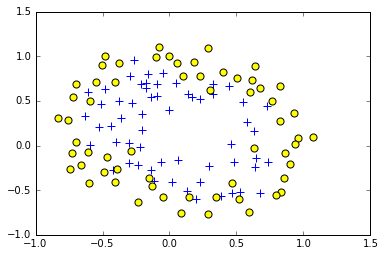

In [15]:
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, 2])

pos = X[np.where(y==1)]
neg = X[np.where(y==0)]

plt.scatter(pos[:,0], pos[:,1], marker='+', s=50)
plt.scatter(neg[:, 0], neg[:,1], c='yellow', marker='o', s=50)
plt.show()

### mapFeature

#### [Note] 
Also, we can use <br>
from sklearn.preprocessing import PolynomialFeatures<br>
PolynomialFeatures(6).fit_transform(X1, X2)<br>

In [82]:
def mapFeature(X1, X2, deg=6):
    if isinstance(X1, np.ndarray):
        out = np.array([np.ones(len(X1))])
    elif isinstance(X1, np.float):
        out = np.array([1])
    else:
        out = np.array([1])
        print("mapFeature: type warning")
        
    for i in range(1,deg+1):
        for j in range(i+1):
            out = np.append( out, [(X1**(i-j))*(X2**(j))], 0)
            
    return out.transpose()

In [44]:
degree = 6
X = mapFeature(X[:,0], X[:,1], degree)

In [18]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,3.423536e-01,...,8.998098e-04,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,1.0,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,3.213347e-01,...,2.763825e-03,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,1.0,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,3.317332e-01,...,1.515091e-02,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,1.0,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,1.266497e-01,...,1.781011e-02,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,1.0,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,1.009603e-01,...,2.659554e-02,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
5,1.0,-0.524770,0.209800,0.275384,-0.110097,0.044016,-1.445130e-01,0.057775,-0.023098,9.234565e-03,...,2.543047e-03,-1.016696e-03,4.064690e-04,2.088401e-02,-8.349308e-03,3.338005e-03,-1.334515e-03,5.335313e-04,-2.133027e-04,8.527719e-05
6,1.0,-0.398040,0.034357,0.158436,-0.013675,0.001180,-6.306380e-02,0.005443,-0.000470,4.055512e-05,...,6.425385e-06,-5.546100e-07,4.787141e-08,3.977043e-03,-3.432803e-04,2.963039e-05,-2.557560e-06,2.207569e-07,-1.905473e-08,1.644718e-09
7,1.0,-0.305880,-0.192250,0.093563,0.058805,0.036960,-2.861892e-02,-0.017987,-0.011305,-7.105572e-03,...,-6.648156e-04,-4.178462e-04,-2.626224e-04,8.190426e-04,5.147801e-04,3.235467e-04,2.033538e-04,1.278108e-04,8.033094e-05,5.048915e-05
8,1.0,0.016705,-0.404240,0.000279,-0.006753,0.163410,4.661648e-06,-0.000113,0.002730,-6.605685e-02,...,-1.843363e-05,4.460706e-04,-1.079435e-02,2.173096e-11,-5.258619e-10,1.272520e-08,-3.079338e-07,7.451610e-06,-1.803196e-04,4.363507e-03
9,1.0,0.131910,-0.513890,0.017400,-0.067787,0.264083,2.295267e-03,-0.008942,0.034835,-1.357096e-01,...,-2.361380e-03,9.199376e-03,-3.583858e-02,5.268249e-06,-2.052385e-05,7.995603e-05,-3.114897e-04,1.213490e-03,-4.727468e-03,1.841709e-02


### Sigmoid

In [19]:
def sigmoid(z):
    return 1 / ( 1+np.exp(-z) )

### cost function with regularization

In [20]:
def costRegFunction(X, y, theta, lamd):
    m = len(y)
    J = (-y.transpose().dot(np.log(sigmoid(X.dot(theta)) )) - (1-y).transpose().dot(np.log(1-sigmoid(X.dot(theta)))))/m + lamd*sum(theta[1:]**2) / (2*m)
    grad = (sigmoid(X.dot(theta)) - y).transpose().dot(X).transpose() /m + np.append(0, theta[1:]/m) * lamd
    return [J, grad]

In [21]:
m, n = X.shape
initTheta = np.zeros(n)
costRegFunction(X, y, initTheta, 1)

[0.69314718055994529,
 array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
          5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
          1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
          2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
          1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
          1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
          5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
          3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
          4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
          3.87936363e-02])]

In [28]:
def computeRegCost(theta, X, y, lamd):
    J, deg = costRegFunction(X, y, theta, lamd)
    return J

### Optimization

In [33]:
lamd = 1
result = spo.minimize(computeRegCost, x0=initTheta, args=(X, y, lamd), method = 'BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48


In [51]:
thetaOpt = result['x']
thetaOpt

array([ 1.27268743,  0.62557018,  1.18096655, -2.0191984 , -0.91761477,
       -1.43194157,  0.12375941, -0.36513121, -0.35703449, -0.17485787,
       -1.45843788, -0.05129701, -0.61603999, -0.2746417 , -1.19282608,
       -0.2427034 , -0.20570061, -0.04499822, -0.27782743, -0.29525883,
       -0.45613315, -1.04377909,  0.02762791, -0.29265675,  0.01543341,
       -0.32759318, -0.14389226, -0.92460208])

### Visualization in 2 ways

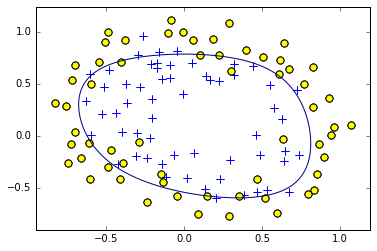

CPU times: user 3min 18s, sys: 2.4 s, total: 3min 20s
Wall time: 3min 48s


In [167]:
%%time
pos = X[np.where(y==1)]
neg = X[np.where(y==0)]

plt.scatter(pos[:,1], pos[:,2], marker='+', s=50)
plt.scatter(neg[:, 1], neg[:,2], c='yellow', marker='o', s=50)

dx = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
dy = np.linspace(min(X[:,2]), max(X[:,2]), 1000)

F = 0
count = 0
z = np.zeros((len(dx), len(dy)))


# Takes time in this way
for indxI, i in enumerate(dx):
    for indxJ, j in enumerate(dy):
        z[indxI, indxJ] = mapFeature(i, j).dot(thetaOpt)
plt.contour(dx, dy, z, [0])

'''
# Alternative way
dx, dy = np.meshgrid(dx, dy)
z = mapFeature(dx.ravel() , dy.ravel()).dot(thetaOpt)
z = z.reshape(dx.shape)
plt.contour(dx, dy, z, [0])
'''
plt.show()

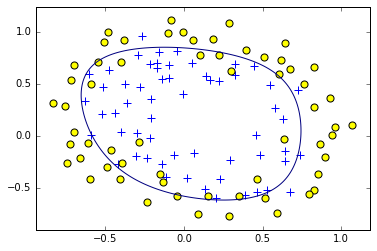

CPU times: user 3.05 s, sys: 2.07 s, total: 5.12 s
Wall time: 5.84 s


In [157]:
%%time
pos = X[np.where(y==1)]
neg = X[np.where(y==0)]

plt.scatter(pos[:,1], pos[:,2], marker='+', s=50)
plt.scatter(neg[:, 1], neg[:,2], c='yellow', marker='o', s=50)

dx = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
dy = np.linspace(min(X[:,2]), max(X[:,2]), 1000)

F = 0
count = 0
z = np.zeros((len(dx), len(dy)))

'''
# Takes time in this way
for indxI, i in enumerate(dx):
    for indxJ, j in enumerate(dy):
        z[indxI, indxJ] = mapFeature(i, j).dot(thetaOpt)

'''

# Alternative way
dx, dy = np.meshgrid(dx, dy)
z = mapFeature(dx.ravel() , dy.ravel()).dot(thetaOpt)
z = z.reshape(dx.shape)
plt.contour(dx, dy, z, [0])

plt.show()